**1. Data Sources & Collection**

"Synthetic Financial Datasets For Fraud Detection" dataset from Kaggle - 
https://www.kaggle.com/datasets/ealaxi/paysim1: 

**2. Import and Construct Dataset**

In [ ]:
# 2.1 Import Sample Data - 'ExportedSubsetData.csv'
# https://www.udacity.com/blog/2020/04/python-and-data-analysis-cheat-sheet.html

import rpy2
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('ExportedSubsetData.csv')
#Print data frame
df

#Print the shape
print(df.shape)

#Dataset Info Summary
df.info()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(50000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            50000 non-null  int64  
 1   type            50000 non-null  object 
 2   amount          50000 non-null  float64
 3   nameOrig        50000 non-null  object 
 4   oldbalanceOrg   50000 non-null  float64
 5   newbalanceOrig  50000 non-null  float64
 6   nameDest        50000 non-null  object 
 7   oldbalanceDest  50000 non-null  float64
 8   newbalanceDest  50000 non-null  float64
 9   isFraud         50000 non-null  int64  
 10  isFlaggedFraud  50000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 4.2+ MB


In [ ]:
# 2.2 Runs the first 5 rows
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,182,CASH_OUT,129804.96,C557034178,0.00,0.00,C823541396,4225880.68,4355685.64,0,0
1,347,PAYMENT,31443.09,C106157646,523617.58,492174.49,M1964962587,0.00,0.00,0,0
2,37,CASH_IN,37045.02,C2119144137,563001.93,600046.95,C1617537788,1276384.02,1109350.62,0,0
3,321,CASH_IN,54229.95,C1783369537,0.00,54229.95,C1462363253,205541.10,151311.15,0,0
4,252,CASH_OUT,61214.57,C680060894,0.00,0.00,C534934221,364102.11,425316.68,0,0


In [ ]:
# 2.3 Investigate all the unique elements within each Feature or Column
# Quick way to see count or distinct value for each column
for column in df:
  unique_vals = np.unique(df[column])
  nr_values = len(unique_vals)
  if nr_values < 36:
    print('The number of values for feature {}: {} -- {}'.format(column, nr_values, unique_vals))
  else:
    print('The number of values for feature {}: {}'.format(column, nr_values))

The number of values for feature step: 429
The number of values for feature type: 5 -- ['CASH_IN' 'CASH_OUT' 'DEBIT' 'PAYMENT' 'TRANSFER']
The number of values for feature amount: 49896
The number of values for feature nameOrig: 50000
The number of values for feature oldbalanceOrg: 29256
The number of values for feature newbalanceOrig: 21673
The number of values for feature nameDest: 48047
The number of values for feature oldbalanceDest: 29053
The number of values for feature newbalanceDest: 31065
The number of values for feature isFraud: 2 -- [0 1]
The number of values for feature isFlaggedFraud: 1 -- [0]


In [ ]:
# 2.4 Convert "isFraud" variable to "object" type since this is the class variable.
df['isFraud'] = df['isFraud'].astype('object')
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            50000 non-null  int64  
 1   type            50000 non-null  object 
 2   amount          50000 non-null  float64
 3   nameOrig        50000 non-null  object 
 4   oldbalanceOrg   50000 non-null  float64
 5   newbalanceOrig  50000 non-null  float64
 6   nameDest        50000 non-null  object 
 7   oldbalanceDest  50000 non-null  float64
 8   newbalanceDest  50000 non-null  float64
 9   isFraud         50000 non-null  object 
 10  isFlaggedFraud  50000 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 4.2+ MB


**3. Statistical Summary**

In [ ]:
# 3.1 Statistic Summary of Numeric Variables:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,243.140540,1.862960e+05,8.612681e+05,8.824226e+05,1.124943e+06,1.253782e+06
std,142.194128,6.793675e+05,2.952606e+06,2.989308e+06,3.298256e+06,3.602902e+06
min,1.000000,1.970000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,155.000000,1.360874e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,238.000000,7.638024e+04,1.442752e+04,0.000000e+00,1.459809e+05,2.251965e+05
75%,334.000000,2.086110e+05,1.096545e+05,1.502079e+05,9.704811e+05,1.134654e+06
max,742.000000,4.218381e+07,4.381886e+07,4.368662e+07,1.569947e+08,1.571410e+08


In [ ]:
# 3.2 Statistic Summary of Categorical Variables:
from pandas import DataFrame
df1 = DataFrame(df, columns= ['type','nameOrig','nameDest','isFraud','isFlaggedFraud'])
stats = df1.describe(include='all')
print (stats)

            type    nameOrig   nameDest  isFraud  isFlaggedFraud
count      50000       50000      50000    50000           50000
unique         5       50000      48047        2               1
top     CASH_OUT  C557034178  C31789747        0               0
freq       17723           1          4    49932           50000


**4. Data Sanity Checks**

In [ ]:
#4.1 Negative Transaction Amounts
print('Number of transactions where the transaction amount is negative: ' + str(sum(df['amount'] < 0)))

Number of transactions where the transaction amount is negative: 0


In [ ]:
#4.2 Check if Transaction Amount is 0
print('Number of transactions where the transaction amount is zero: ' + str(sum(df['amount'] == 0)))

Number of transactions where the transaction amount is zero: 0


In [ ]:
#4.3 Missing or Null Values Check (version 1)
print('Number of missing values in any column: ' + str(df.isnull().sum().max()))

Number of missing values in any column: 0


In [ ]:
#4.4 Check for Null values (version 2)
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**5. Data Exploratory Analysis**

**5.1 - Class Imbalance: "IsFraud"**

In [ ]:
# 5.1.1 Evaluate "isFraud" class variable - the most frequent category and its frequency
df['isFraud'].describe(include='all')

count     50000
unique        2
top           0
freq      49932
Name: isFraud, dtype: int64

In [ ]:
# 5.1.2 Class Imbalance - Percentage Frequency for "isFraud" variable
dFraud = pd.DataFrame(df, columns= ['isFraud'])
# Percentage calculation
(dFraud['isFraud'].value_counts()/dFraud['isFraud'].count())*100

0    99.864
1     0.136
Name: isFraud, dtype: float64

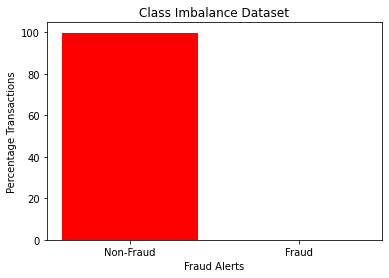

In [ ]:
# 5.1.3 Visualiazation - Histogram for Imbalance Data Visualization
import matplotlib.pyplot as plt
  
# x-coordinates of left sides of bars 
left = [1, 2]
  
# heights of bars
height = [99.864, 0.136]
  
# labels for bars
tick_label = ['Non-Fraud', 'Fraud']
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
  
# naming the x-axis
plt.xlabel('Fraud Alerts')
# naming the y-axis
plt.ylabel('Percentage Transactions')
# plot title
plt.title('Class Imbalance Dataset')
  
# function to show the plot
plt.show()

**5.2 - Visualization of Correlations**

In [ ]:
# Convert the "type" transaction categorical data type to numerical data to enable analysis
# https://www.geeksforgeeks.org/how-to-convert-categorical-string-data-into-numeric-in-python/
# Use.get_dummies function to convert the categorical datatype to numerical and storing the returned DataFrame in a new variable df1
df1 = pd.get_dummies(df['type'])
 
# Use pd.concat to concatenate the dataframes. df and df1 and storing the concatenated DataFrame in df.
#df = pd.concat([df, df1], axis=1).reindex(df.index)
df2 = pd.concat([df, df1], axis=1).reindex(df.index)
 
# Remove the column 'type' from df as it is of no use now.
#df.drop('type', axis=1, inplace=True)
#df.drop(['type', 'isFlaggedFraud'], axis=1, inplace=True)
df2.drop(['type', 'isFlaggedFraud'], axis=1, inplace=True)
 
# printing df
#df
df2

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,182,129804.96,C557034178,0.00,0.00,C823541396,4225880.68,4355685.64,0,0,1,0,0,0
1,347,31443.09,C106157646,523617.58,492174.49,M1964962587,0.00,0.00,0,0,0,0,1,0
2,37,37045.02,C2119144137,563001.93,600046.95,C1617537788,1276384.02,1109350.62,0,1,0,0,0,0
3,321,54229.95,C1783369537,0.00,54229.95,C1462363253,205541.10,151311.15,0,1,0,0,0,0
4,252,61214.57,C680060894,0.00,0.00,C534934221,364102.11,425316.68,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,380,10534.48,C120732296,0.00,0.00,M1915420007,0.00,0.00,0,0,0,0,1,0
49996,402,32294.97,C1902387221,17712.00,50006.97,C1964108523,117531.60,85236.59,0,1,0,0,0,0
49997,165,81109.38,C1587276247,23905.07,0.00,C174210259,1501333.00,1582443.00,0,0,1,0,0,0
49998,258,17050.46,C1571710982,32554.77,15504.31,M1926601839,0.00,0.00,0,0,0,0,1,0


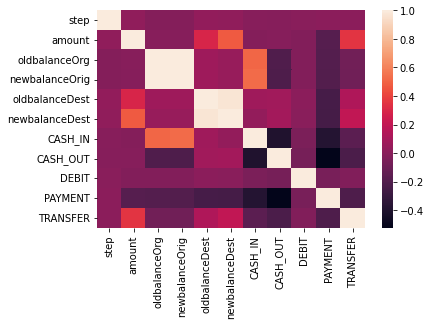

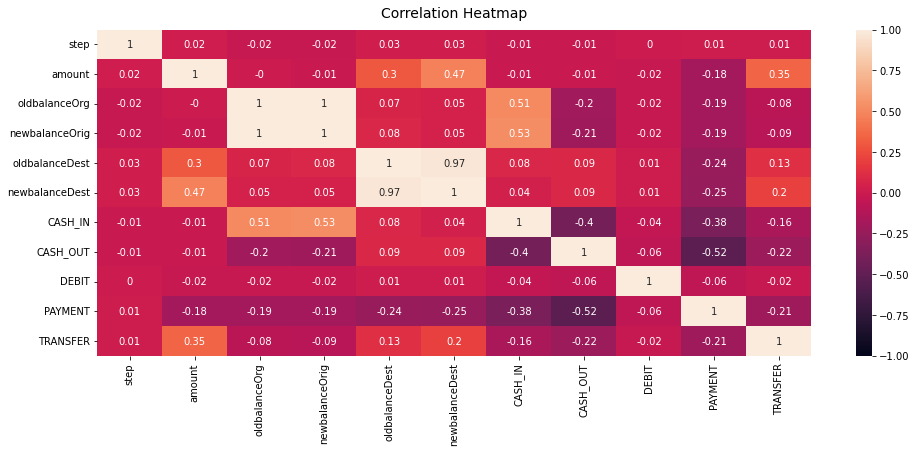

In [ ]:
# 5.2.1 Correlation Heatmap: all variables
# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e#:~:text=%23%20Set%20the%20range%20of%20values,a%20title%20to%20the%20heatmap.
df.corr()
sns.heatmap(df2.corr());

# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df2.corr().round(2), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [ ]:
# Print column name for ease of copy and pasting to code below
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor 

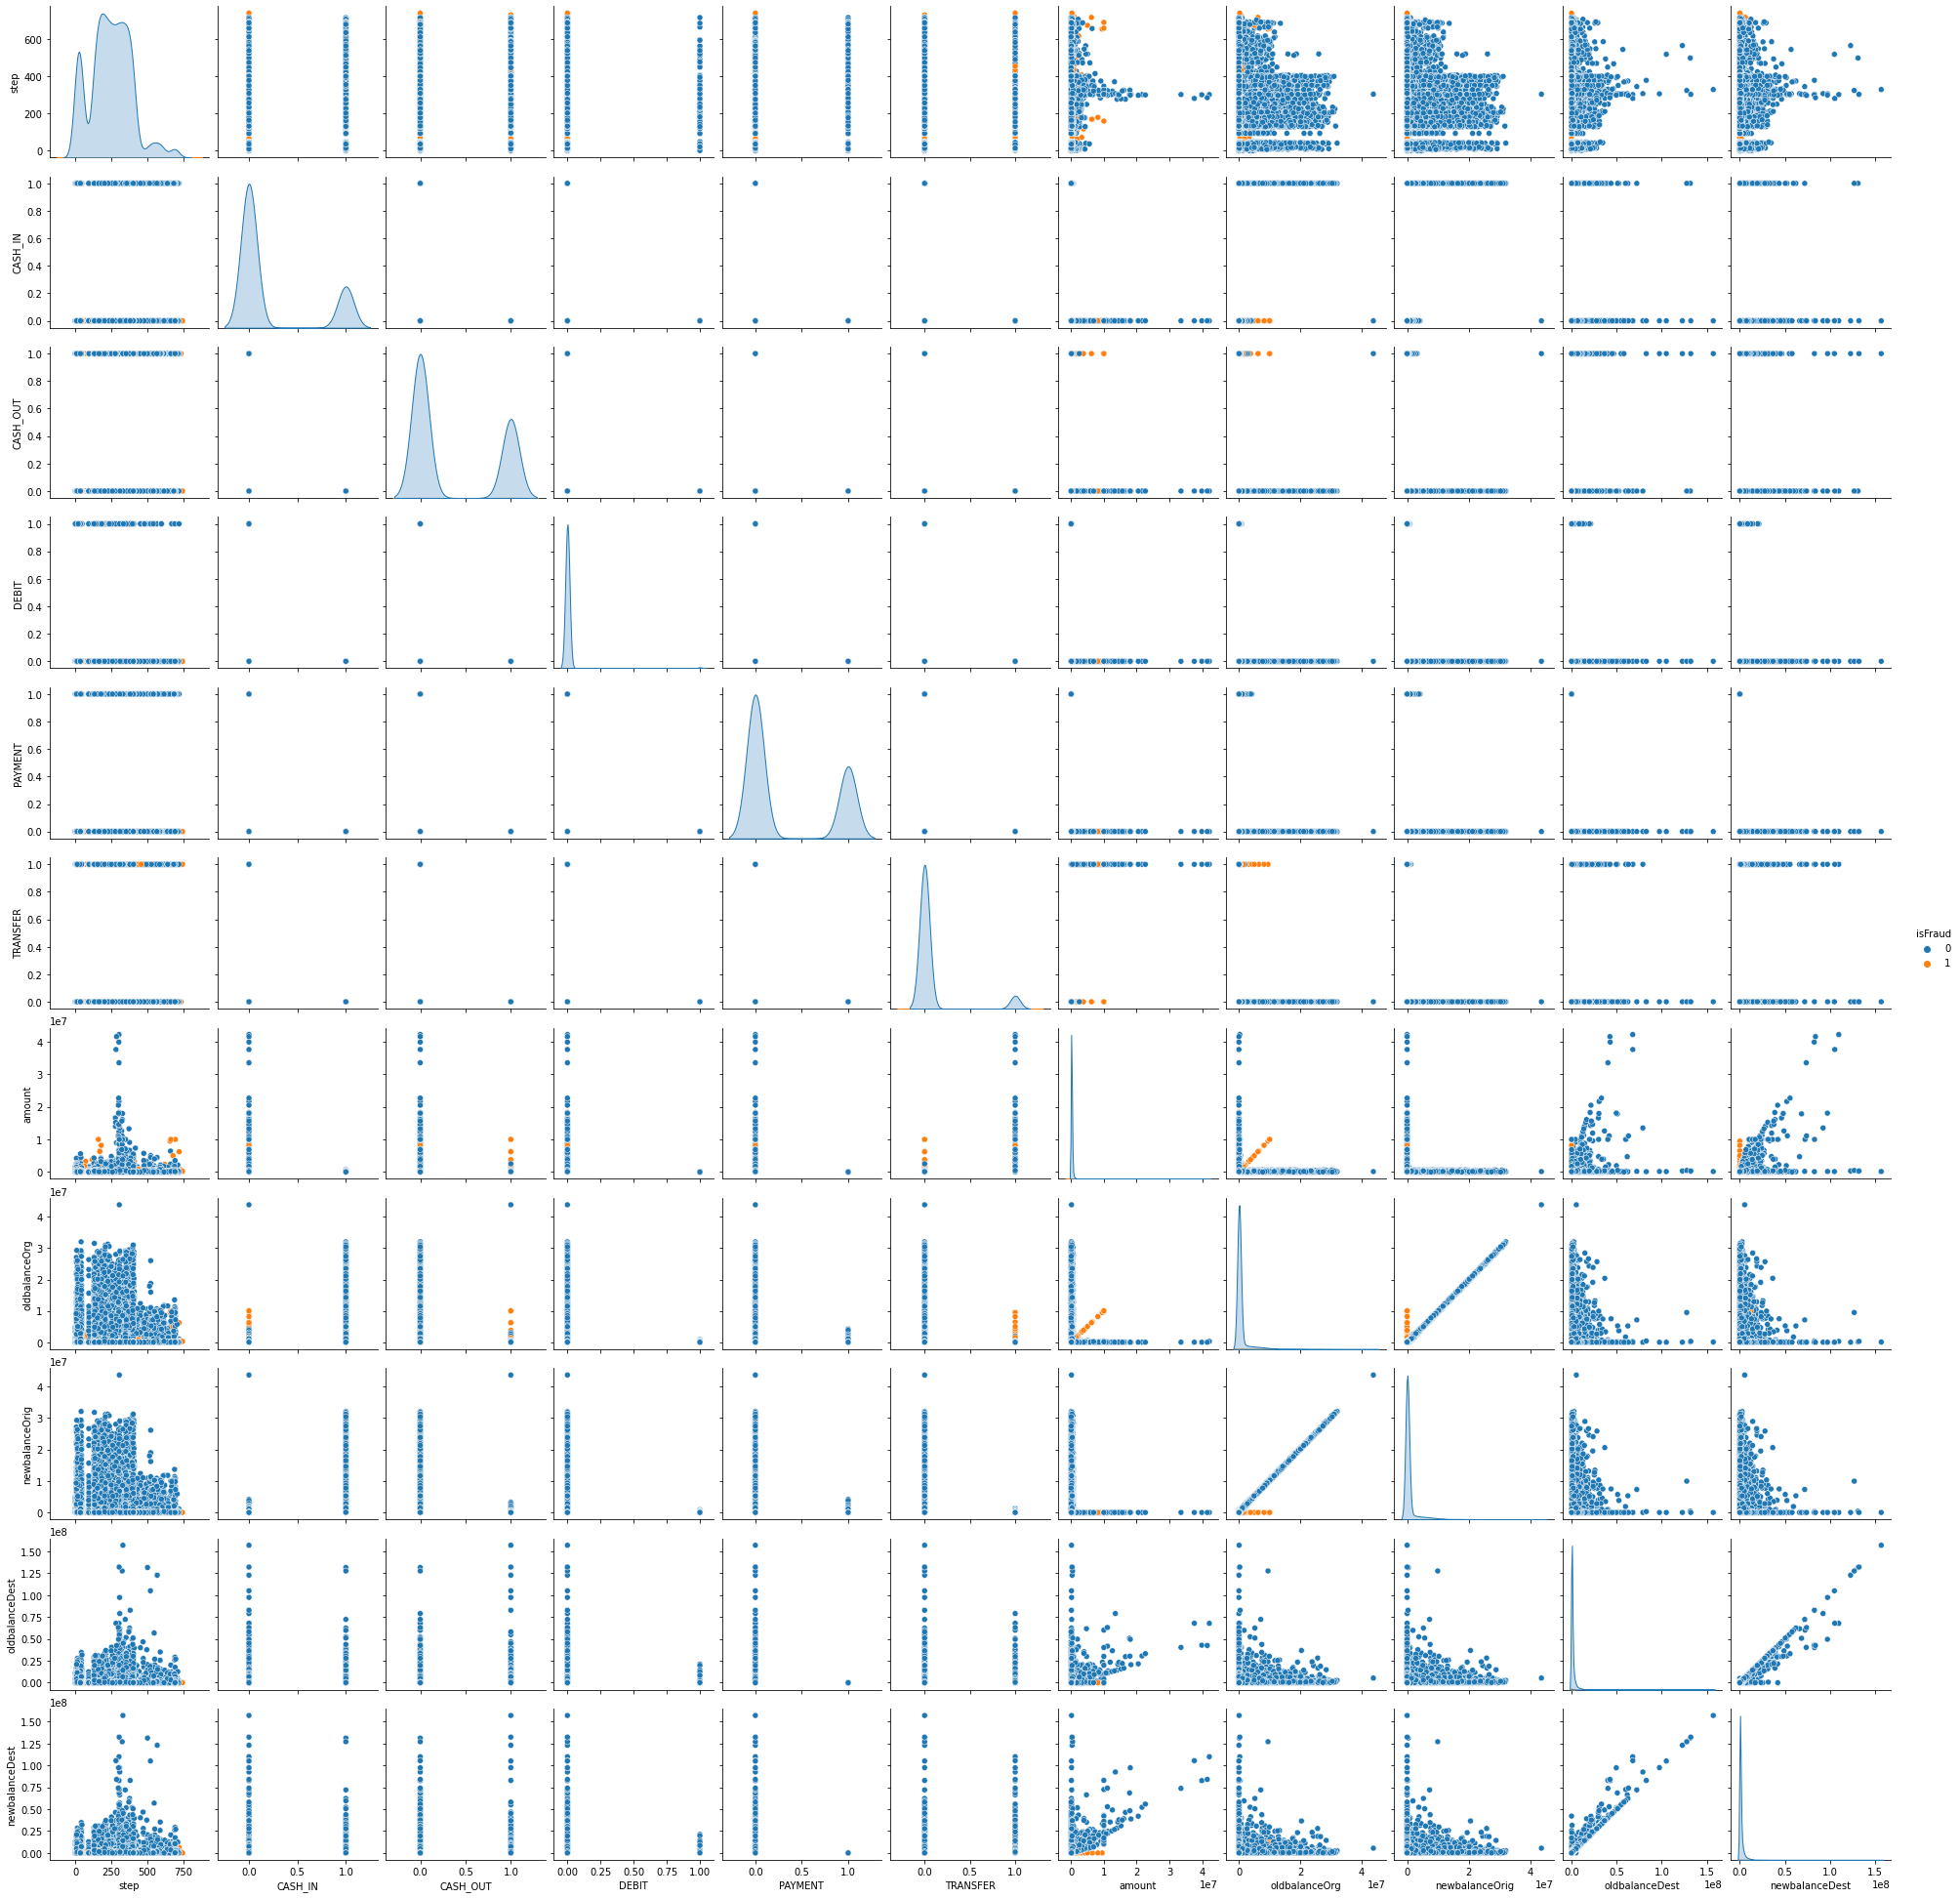

In [ ]:
# 5.2.2 Visualize the data using Seaborn Pairplots
#Limiting the data to include Numeric colummns (excluding nameOrig, nameDest, isFlaggedFraud)
dfVisual = df2[['step', 'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud']]

# Seaborn Pairplots
g = sns.pairplot(dfVisual, hue='isFraud', diag_kws={'bw': 0.2})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor 

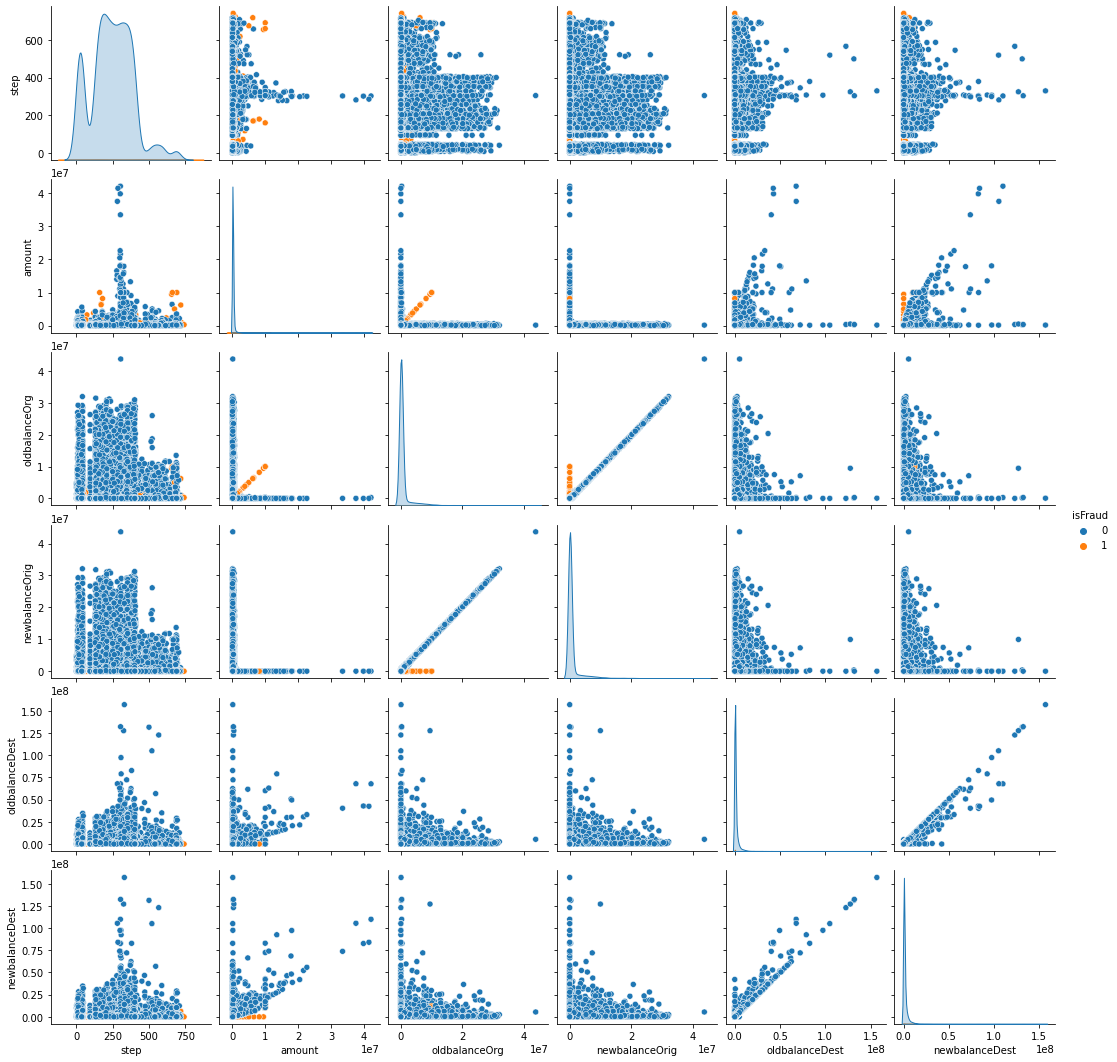

In [ ]:
# 5.2.2(a) Limiting the data to include Numeric colummns excluding type
dfVisual = df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud']]

#Visualize the data using seaborn Pairplots
g = sns.pairplot(dfVisual, hue='isFraud', diag_kws={'bw': 0.2})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor 

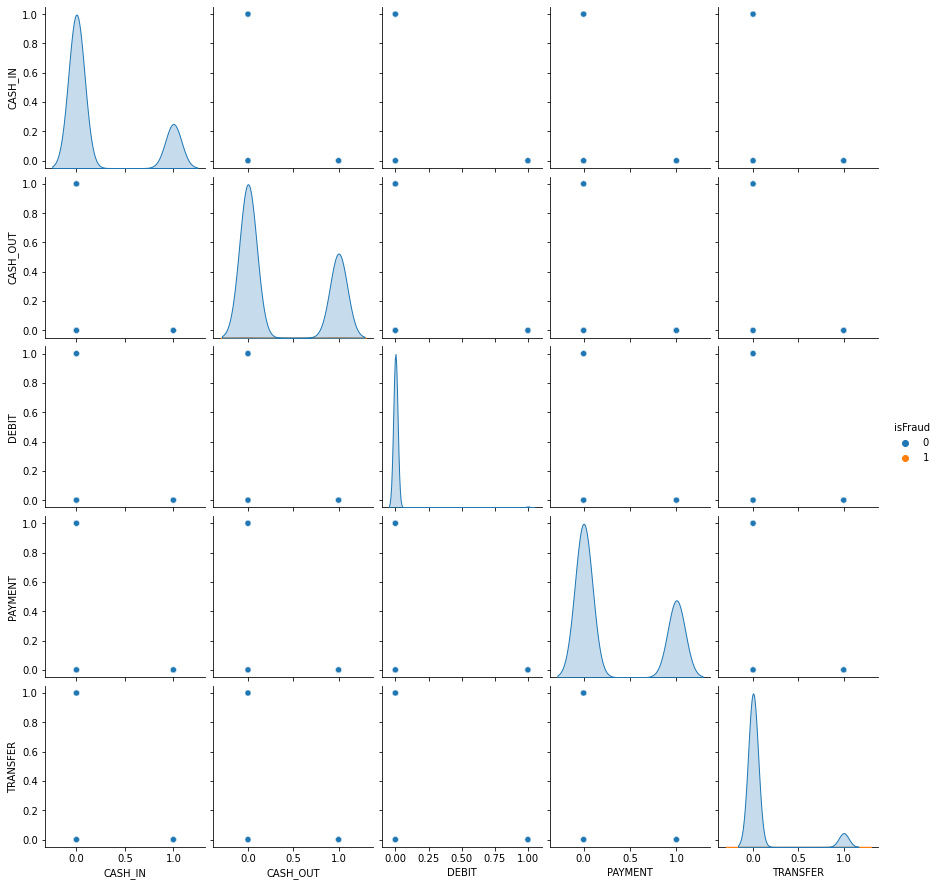

In [ ]:
# 5.2.2(b) Limiting the data to include "type" columns
dfVisual = df[['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER', 'isFraud']]

#Visualize the data using seaborn Pairplots
g = sns.pairplot(dfVisual, hue='isFraud', diag_kws={'bw': 0.2})

**5.3 - Fraud Transaction on Type of Transactions - "type"**

In [ ]:
# 5.3.1 Type of Transactions
df['type'].describe(include='all')
# Percentage Frequency-Type
dType = pd.DataFrame(df, columns= ['type'])
# Percentage calculation
#(dType['type'].value_counts()/dType['type'].count())*100
# Type - Count of Volume
(dType['type'].value_counts())

CASH_OUT    17723
PAYMENT     16665
CASH_IN     11129
TRANSFER     4156
DEBIT         327
Name: type, dtype: int64

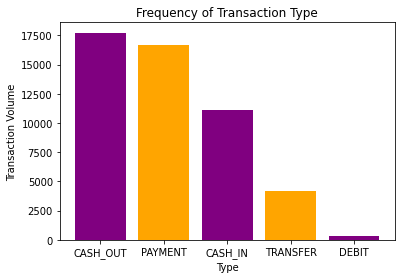

In [ ]:
# Histogram for Type
# x-coordinates of left sides of bars 
left = [1, 2, 3, 4, 5]
  
# heights of bars
height = [17723, 16665, 11129, 4156, 327]
  
# labels for bars
tick_label = ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT']
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['purple','orange'])
  
# naming the x-axis
plt.xlabel('Type')
# naming the y-axis
plt.ylabel('Transaction Volume')
# plot title
plt.title('Frequency of Transaction Type')
  
# function to show the plot
plt.show()

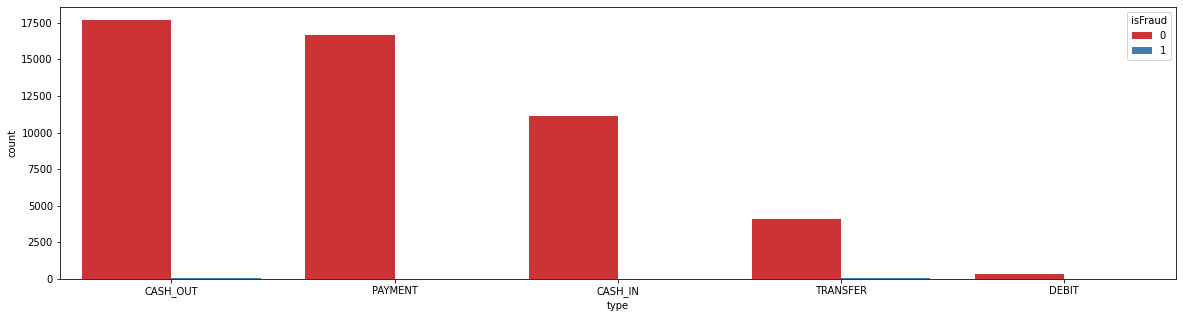

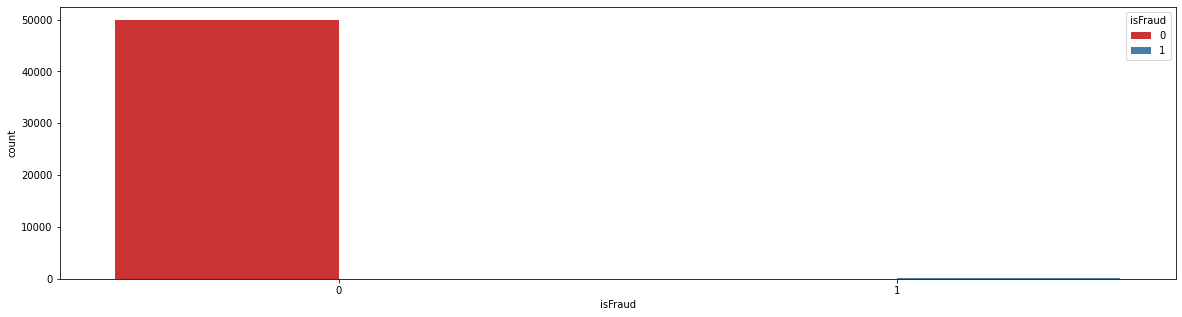

In [ ]:
# 5.3.2 Correlation between transaction type and "isFraud"
# Seaborn plot or Resize:  https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/
CatFeatures = ['type','isFraud']

for f in CatFeatures:
  plt.figure(figsize = (20,5))
  #ax = sns.countplot(x=f, data=dfVisual, hue = 'isFraud', palette = "Set1")
  ax = sns.countplot(x=f, data=df, hue = 'isFraud', palette = "Set1")

**5.4 - Originator's Balance and Recipient's Balance**

In [ ]:
# Originator's Initial Balance
df['oldbalanceOrg'].describe(include='0')
# Percentage Frequency-Type
OrigNew = pd.DataFrame(df, columns= ['oldbalanceOrg'])
# Percentage calculation
#(dType['type'].value_counts()/dType['type'].count())*100
# Type - Count of Volume
(OrigNew['oldbalanceOrg'].value_counts()/OrigNew['oldbalanceOrg'].count())*100

0.00         33.100
159.00        0.026
181.00        0.024
190.00        0.024
172.00        0.024
              ...  
250150.23     0.002
60673.00      0.002
84098.94      0.002
100973.00     0.002
40688.00      0.002
Name: oldbalanceOrg, Length: 29256, dtype: float64

In [ ]:
# Originator's Final Balance
df['newbalanceOrig'].describe(include='0')
# Percentage Frequency-Type
OrigFinal = pd.DataFrame(df, columns= ['newbalanceOrig'])
# Percentage calculation
#(dType['type'].value_counts()/dType['type'].count())*100
# Type - Count of Volume
(OrigFinal['newbalanceOrig'].value_counts()/OrigFinal['newbalanceOrig'].count())*100

0.00           56.644
36143.49        0.004
119266.08       0.004
13958.18        0.004
17202.75        0.004
                ...  
465623.93       0.002
60850.83        0.002
11019742.68     0.002
708410.64       0.002
15504.31        0.002
Name: newbalanceOrig, Length: 21673, dtype: float64

In [ ]:
# Recipient's Initial Balance
df['oldbalanceDest'].describe(include='0')
# Percentage Frequency-Type
DestOld = pd.DataFrame(df, columns= ['oldbalanceDest'])
# Percentage calculation
#(dType['type'].value_counts()/dType['type'].count())*100
# Type - Count of Volume
(DestOld['oldbalanceDest'].value_counts()/DestOld['oldbalanceDest'].count())*100

0.00           41.876
10000000.00     0.008
195.00          0.004
19987.00        0.004
2331362.00      0.004
                ...  
105047.35       0.002
1253809.53      0.002
58209.70        0.002
23489790.60     0.002
343.00          0.002
Name: oldbalanceDest, Length: 29053, dtype: float64

In [ ]:
# Recipient's Final Balance : contrary to Al Marri's finding - 0.6% (p.24)
df['newbalanceDest'].describe(include='0')
# Percentage Frequency-Type
DestNew = pd.DataFrame(df, columns= ['newbalanceDest'])
# Percentage calculation
#(dType['type'].value_counts()/dType['type'].count())*100
# Type - Count of Volume
(DestNew['newbalanceDest'].value_counts()/DestNew['newbalanceDest'].count())*100

0.00          37.824
1932250.76     0.004
6564973.20     0.004
1598973.00     0.004
122121.38      0.004
               ...  
712964.80      0.002
62870.53       0.002
282804.11      0.002
307298.50      0.002
20519.93       0.002
Name: newbalanceDest, Length: 31065, dtype: float64

In [ ]:
# Recipient's final balance = recipient's initial balance + transaction amount
RecipientFinalBalance = (df['oldbalanceDest'] + df['amount'])
#find out if RecipientFinalBalance == df['newbalanceDest']
Comparison_column = np.where(df["newbalanceDest"] == (df['oldbalanceDest'] + df['amount']), True, False)

#Count: True vs False
countComparison = pd.DataFrame(df, columns= ['Comparison_column'])
# Percentage calculation
(countComparison['Comparison_column'].value_counts()/countComparison['Comparison_column'].count())*100

Series([], Name: Comparison_column, dtype: float64)

In [ ]:
#Defining inaccuracies in originator and recipient balances
df['origBalance_inacc'] = (df['oldbalanceOrg'] - df['amount']) - df['newbalanceOrig']
df['origBalance_inacc']

0       -1.298050e+05
1        0.000000e+00
2       -7.409004e+04
3       -1.084599e+05
4       -6.121457e+04
             ...     
49995   -1.053448e+04
49996   -6.458994e+04
49997   -5.720431e+04
49998    1.818989e-12
49999   -7.557240e+04
Name: origBalance_inacc, Length: 50000, dtype: float64

**5.5 - Fraud Transaction on Time Step - "step"**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


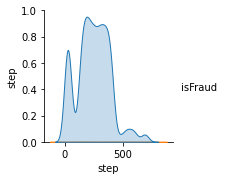

In [ ]:
TimeStep = df[['step', 'isFraud']]

#Visualize the data using seaborn Pairplots
g = sns.pairplot(TimeStep, hue='isFraud', diag_kws={'bw': 0.2})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.0 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


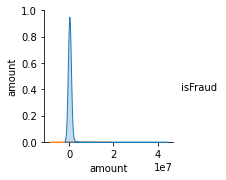

In [ ]:
Amount = df[['amount', 'isFraud']]

#Visualize the data using seaborn Pairplots
g = sns.pairplot(Amount, hue='isFraud', diag_kws={'bw': 1.0})

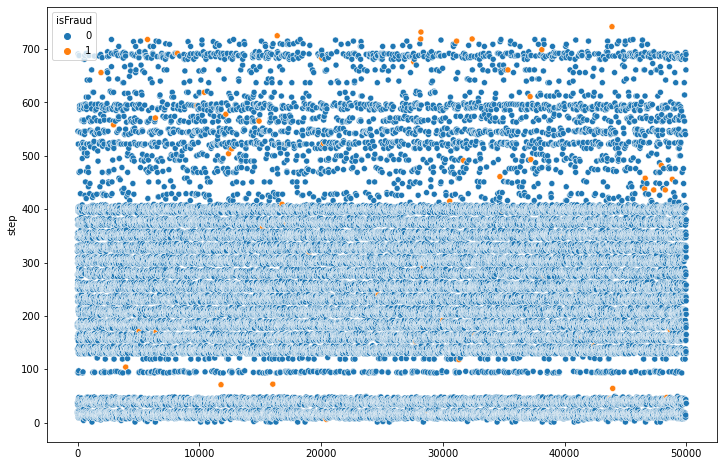

In [ ]:
# https://stackoverflow.com/questions/67021061/how-to-find-the-correlation-between-categorical-and-numerical-columns
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.scatterplot(data=df, x=df.index, y='step', hue='isFraud')

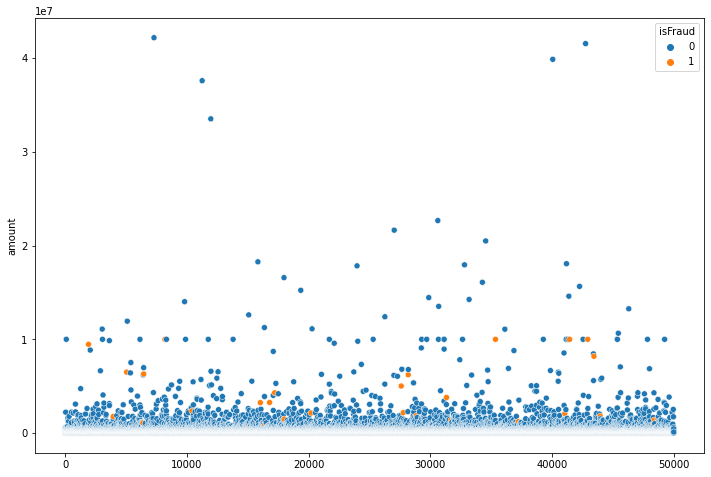

In [ ]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.scatterplot(data=df, x=df.index, y='amount', hue='isFraud')

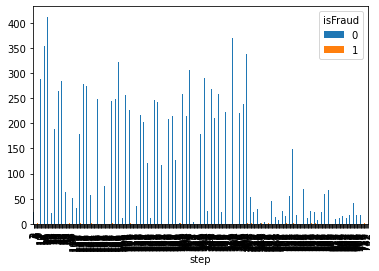

In [ ]:
#https://stackoverflow.com/questions/34251641/how-to-make-a-bar-plot-of-non-numerical-data-in-pandas

df=df.groupby(['step','isFraud']).size()
df=df.unstack()
df.plot(kind='bar')

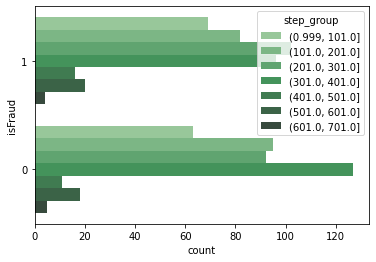

In [ ]:
# https://stackoverflow.com/questions/34251641/how-to-make-a-bar-plot-of-non-numerical-data-in-pandas
from random import randint
from random import choice
df5 = pd.DataFrame(data={"step": randint(1, 800), "isFraud": [choice(['0', '1']) for i in range(800)]})

df5['step_group'] = pd.cut(df.step, bins=[g for g in range(1, 800, 100)], include_lowest=True)
df5.head()

sns.countplot(y='isFraud', hue='step_group', data=df5, palette="Greens_d")